In [2]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

import numpy as np

import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.func as func
import mlgrad.regnorm as regnorm
import mlgrad.avragg as avragg
import mlgrad.clsfy as clsfy

# from mlgrad import erm_fg, erm_irgd, fg, weights, averager_it, erisk, sg, erm_sg

#import sklearn.linear_model as sklm
import sklearn.datasets as datasets

#plt.style.available

In [3]:
X, Y = datasets.load_wine(return_X_y=True)
N = len(X)
n = X.shape[1]
print(X.shape, Y.shape)

(178, 13) (178,)


In [4]:
I12 = (Y == 1) | (Y == 2)
I0 = (Y == 0)
XX = X
XX = np.ascontiguousarray(XX)
YY = Y.copy()
np.putmask(YY, I12, 1)
# Y12 -= 1
YY = 2*YY-1
YY = np.ascontiguousarray(YY.astype('d'))
print(YY)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [5]:
print(XX)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [6]:
mod_h = model.LinearModel(n)
mod_h.init_param()

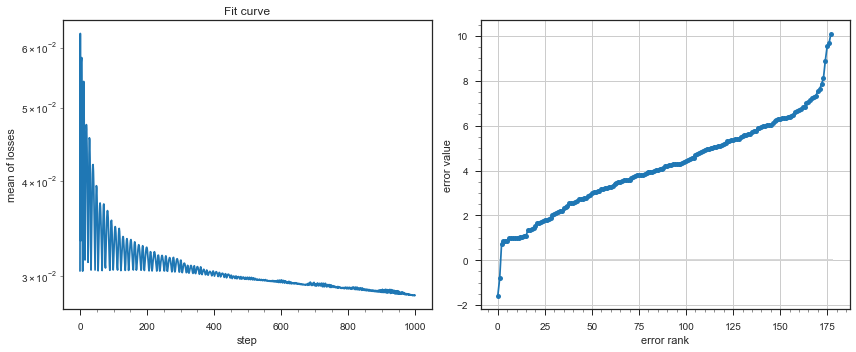

In [14]:
lossfunc = loss.MarginLoss(func.Hinge(1.0))
cls_h = clsfy.classification_as_regr(XX, YY, mod_h, lossfunc=lossfunc)
clsfy.plot_losses_and_errors(cls_h, XX, YY)

In [34]:
mod_mh = model.LinearModel(n)
mod_mh.init_param()

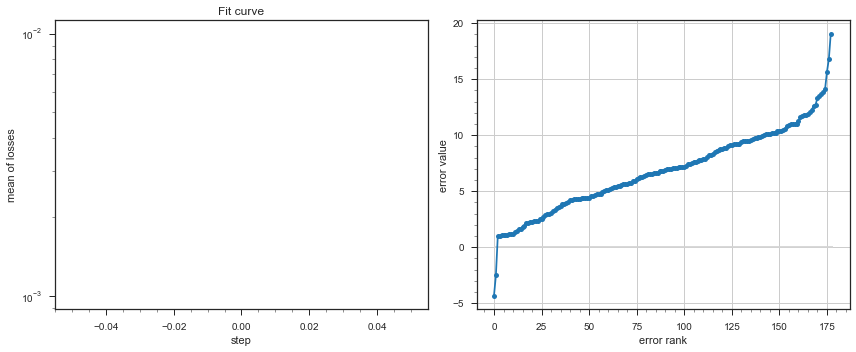

In [37]:
avrfunc = clsfy.averaging_function('WM', alpha=0.98, rhofunc=func.Sqrt(1.0))
lossfunc = loss.MarginLoss(func.Hinge(1.0))
cls_mh = clsfy.classification_as_mregr(XX, YY, mod_mh, lossfunc=lossfunc, avrfunc=avrfunc)
clsfy.plot_losses_and_errors(cls_mh, XX, YY)

In [38]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(np.sign(mod_mh.evaluate_all(XX)), YY)

0.9887640449438202

In [42]:
accuracy_score(np.sign(mod_h.evaluate_all(XX)), YY)

0.9887640449438202

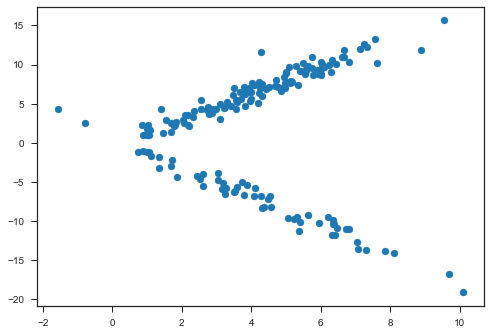

In [44]:
plt.scatter(YY*mod_h.evaluate_all(XX), mod_mh.evaluate_all(XX))
plt.show()